In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import outlier_detection

import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [10]:
df_dev = pd.read_csv('development.csv')
df_eval = pd.read_csv('evaluation.csv')

df_dev.head(2)

,id,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,0,http://mashable.com/2014/09/08/safest-cabbies-...,121.0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,...,-0.160714,-0.50,-0.071429,0.0,0.0,0.5,0.0,2900,bus,tuesday
1,1,http://mashable.com/2013/07/25/3d-printed-rifle/,532.0,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,...,-0.157500,-0.25,-0.100000,0.0,0.0,0.5,0.0,1300,tech,thursday


In [11]:
df_dev.shape,df_eval.shape

((31715, 50), (7917, 49))

In [12]:
# delete url, timedelta and id columns --> not predictive
del df_dev['id'] 
del df_dev['url']
del df_dev['timedelta']

In [13]:
df_dev.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.0,1.0,4.656158,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,tuesday
1,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,NaN,1.0,4.576541,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,thursday
2,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.0,1.0,4.935345,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,wednesday
3,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.0,NaN,4.970760,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,wednesday
4,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,NaN,0.0,5.006993,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,thursday


In [14]:
df_dev.shape

(31715, 47)

In [15]:
# missing values

df_dev.isna().sum()

n_tokens_title                     0
n_tokens_content                   0
n_unique_tokens                    0
n_non_stop_words                   0
n_non_stop_unique_tokens           0
num_hrefs                          0
num_self_hrefs                     0
num_imgs                        6375
num_videos                      6331
average_token_length               0
num_keywords                    6318
kw_min_min                         0
kw_max_min                         0
kw_avg_min                         0
kw_min_max                         0
kw_max_max                         0
kw_avg_max                         0
kw_min_avg                         0
kw_max_avg                         0
kw_avg_avg                         0
self_reference_min_shares          0
self_reference_max_shares          0
self_reference_avg_sharess         0
LDA_00                             0
LDA_01                             0
LDA_02                             0
LDA_03                             0
L

In [16]:
#replace missing values with the mean 

columns_with_missing_values = ['num_imgs', 'num_videos', 'num_keywords']

for column in columns_with_missing_values:
    mean_value = df_dev[column].mean()
    df_dev[column].fillna(mean_value, inplace=True)

In [17]:
#check for duplicated data --> no duplicated

df_dev.duplicated().sum()

0

In [18]:
# n_tokens_content --> many values are 0
# then delete empty articles

df_dev = df_dev[df_dev['n_tokens_content'] != 0]

In [19]:
# weekdays --> encode each day as 0,1,2,...7

weekday_mapping = {
    'monday': 0,
    'tuesday': 1,
    'wednesday': 2,
    'thursday': 3,
    'friday': 4,
    'saturday': 5,
    'sunday': 6
}

# Replace the values in 'weekday' column with encoded values
df_dev['weekday'] = df_dev['weekday'].replace(weekday_mapping)

df_dev.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,data_channel,weekday
0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.000000,1.0000,4.656158,...,-0.160714,-0.50,-0.071429,0.0,0.00,0.5,0.00,2900,bus,1
1,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,4.533899,1.0000,4.576541,...,-0.157500,-0.25,-0.100000,0.0,0.00,0.5,0.00,1300,tech,3
2,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.000000,1.0000,4.935345,...,-0.427500,-1.00,-0.187500,0.0,0.00,0.5,0.00,17700,lifestyle,2
3,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.000000,1.2591,4.970760,...,-0.216667,-0.25,-0.166667,0.4,-0.25,0.1,0.25,1500,bus,2
4,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,4.533899,0.0000,5.006993,...,-0.251786,-0.50,-0.100000,0.2,-0.10,0.3,0.10,1400,tech,3


In [20]:
# data_channel --> it takes only 5 values, so it will be encoded with one hot encoding

one_hot_encoded = pd.get_dummies(df_dev['data_channel'])

# Concatenate the one-hot encoded columns with the original DataFrame
df_dev = pd.concat([df_dev, one_hot_encoded], axis=1)
df_dev.drop('data_channel', axis=1)


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,abs_title_subjectivity,abs_title_sentiment_polarity,shares,weekday,bus,entertainment,lifestyle,socmed,tech,world
0,12.0,1015.0,0.422018,1.0,0.545031,10.0,6.0,33.000000,1.0000,4.656158,...,0.500000,0.000000,2900,1,1,0,0,0,0,0
1,9.0,503.0,0.569697,1.0,0.737542,9.0,0.0,4.533899,1.0000,4.576541,...,0.500000,0.000000,1300,3,0,0,0,0,1,0
2,9.0,232.0,0.646018,1.0,0.748428,12.0,3.0,4.000000,1.0000,4.935345,...,0.500000,0.000000,17700,2,0,0,1,0,0,0
3,12.0,171.0,0.722892,1.0,0.867925,9.0,5.0,0.000000,1.2591,4.970760,...,0.100000,0.250000,1500,2,1,0,0,0,0,0
4,11.0,286.0,0.652632,1.0,0.800000,5.0,2.0,4.533899,0.0000,5.006993,...,0.300000,0.100000,1400,3,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31709,11.0,518.0,0.500000,1.0,0.703008,9.0,0.0,1.000000,1.0000,4.372587,...,0.211111,0.155556,684,3,0,0,1,0,0,0
31710,11.0,440.0,0.564103,1.0,0.718978,10.0,2.0,4.533899,1.2591,4.784091,...,0.500000,0.000000,1000,1,0,0,0,0,0,1
31712,9.0,969.0,0.489583,1.0,0.710623,6.0,5.0,2.000000,1.0000,4.594427,...,0.500000,0.000000,2400,1,0,0,0,0,1,0
31713,11.0,1976.0,0.412308,1.0,0.621080,21.0,3.0,1.000000,3.0000,4.353239,...,0.200000,0.400000,6000,4,0,0,1,0,0,0


# Target Variable -- Shares

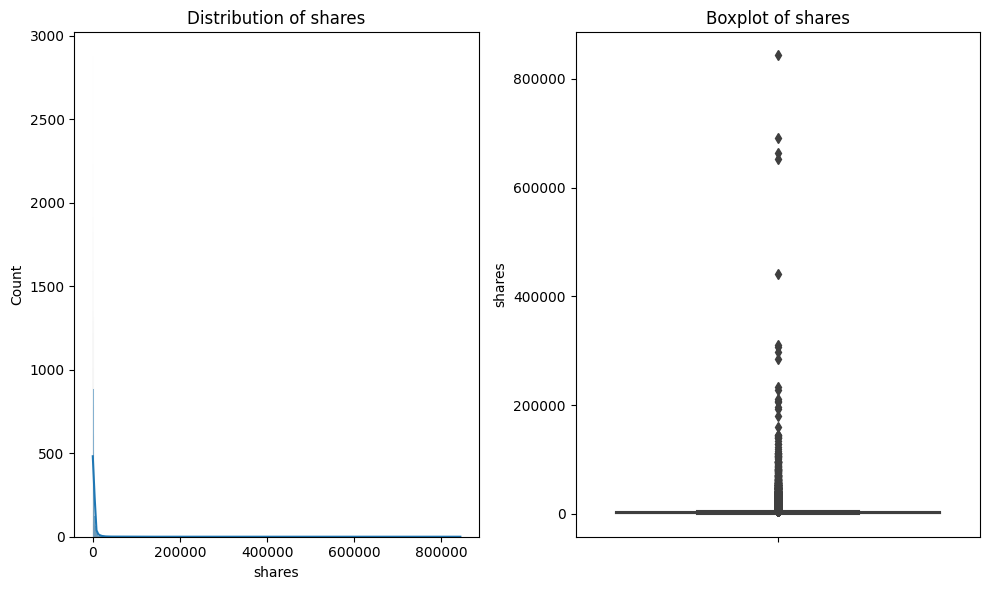

In [21]:
# normalize the distribution of shares by applying logatithm 

outlier_detection.plot_distribution(df_dev,'shares')

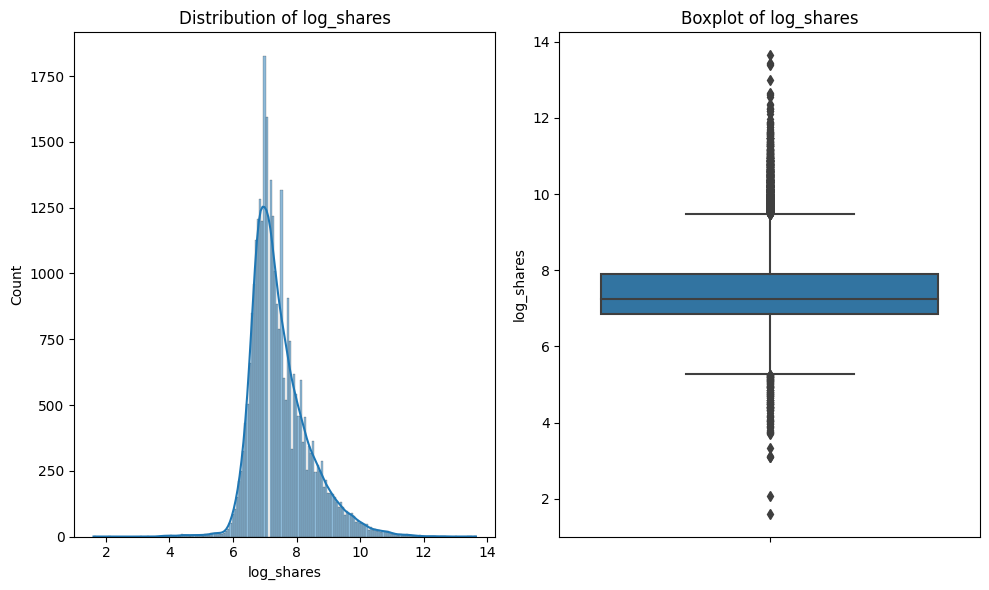

In [22]:
# normalize the distribution of shares by applying logatithm 

df_dev['log_shares'] = np.log(df_dev['shares'])

outlier_detection.plot_distribution(df_dev,'log_shares')

In [ ]:
df_dev['log_shares'].median()

7.24422751560335

# Examining the Relationship between Features and Target

<AxesSubplot: xlabel='popularity', ylabel='count'>

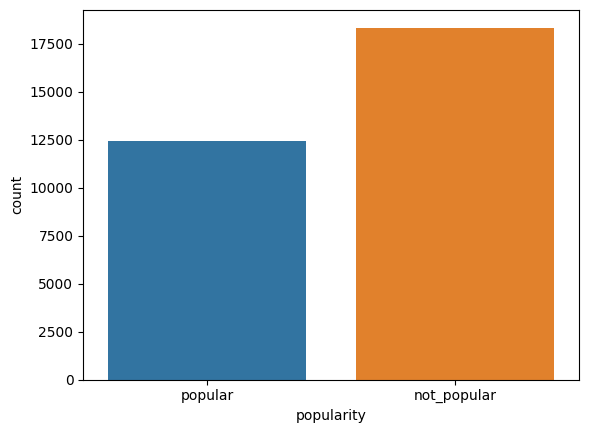

In [23]:
#let's divide values into 2 values of sharing (not_popular,popular)

def create_shares_levels(df):
    values = df_dev['log_shares']
    mean = df_dev['log_shares'].mean()
    shares_levels = list()
    for val in values:
        if val <= mean:
            shares_levels.append('not_popular')
        else:
            shares_levels.append('popular')
    return shares_levels

share_levels = create_shares_levels(df_dev)

df_dev['popularity'] = share_levels

sns.countplot(x='popularity',data=df_dev)

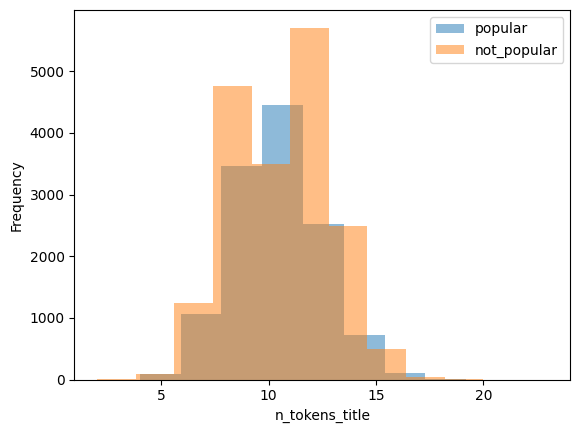

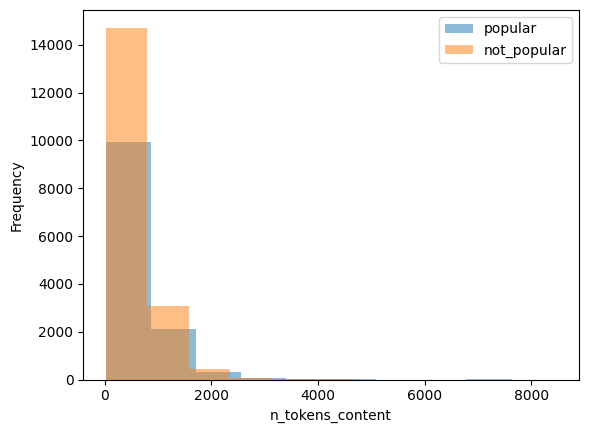

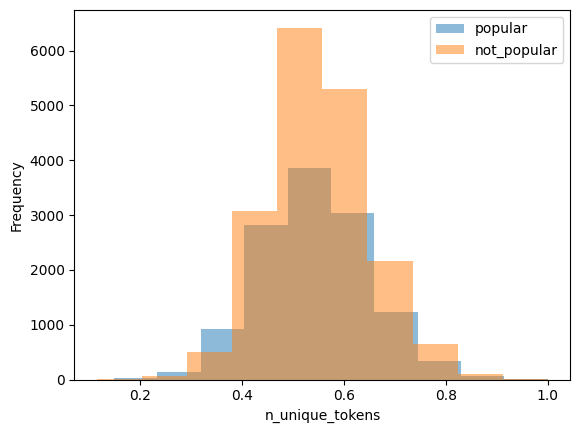

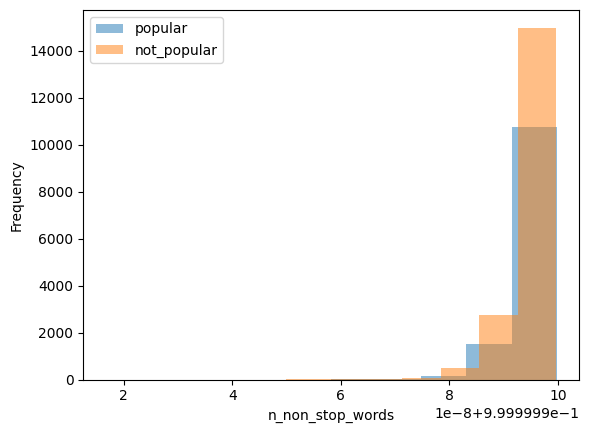

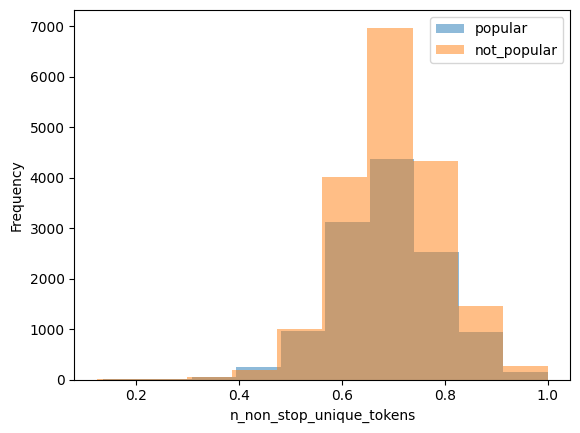

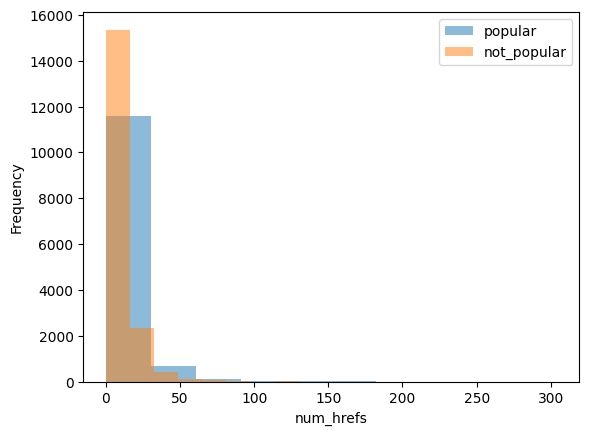

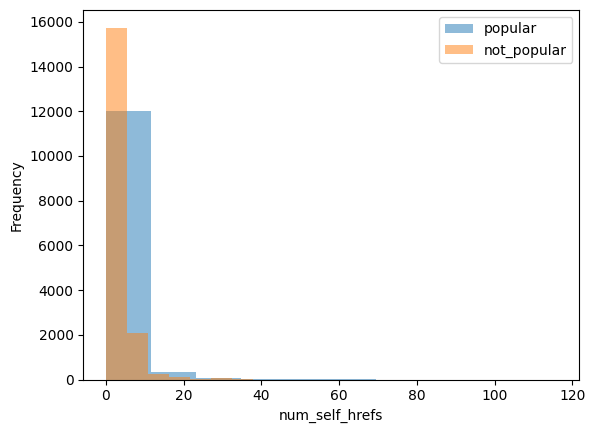

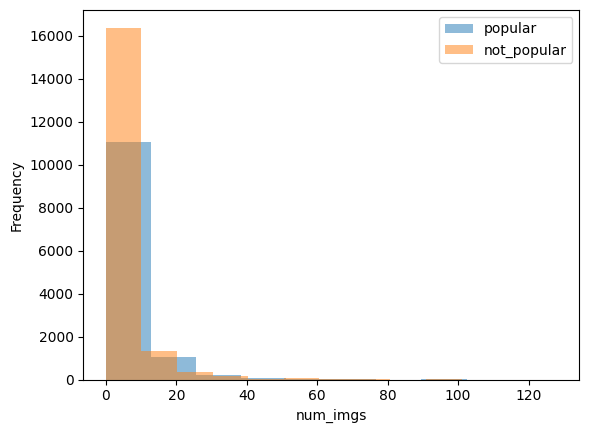

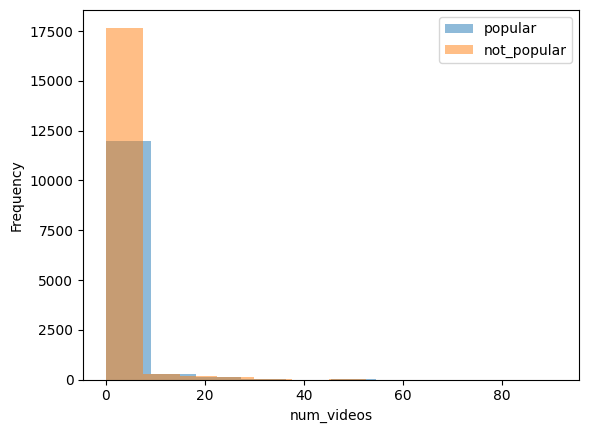

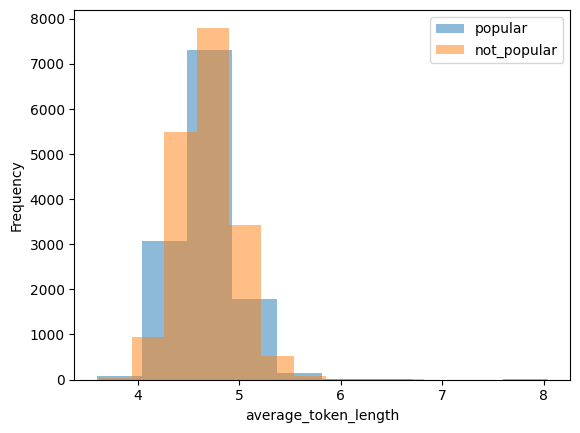

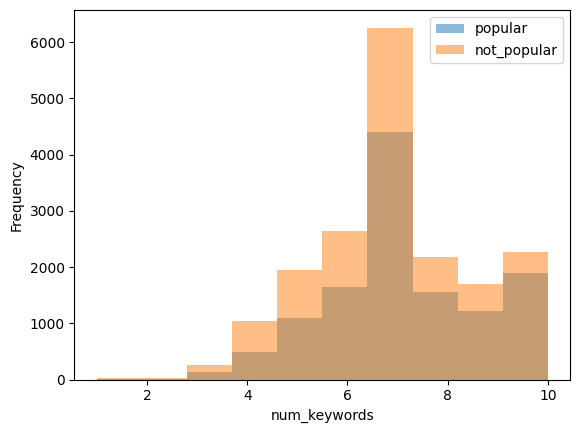

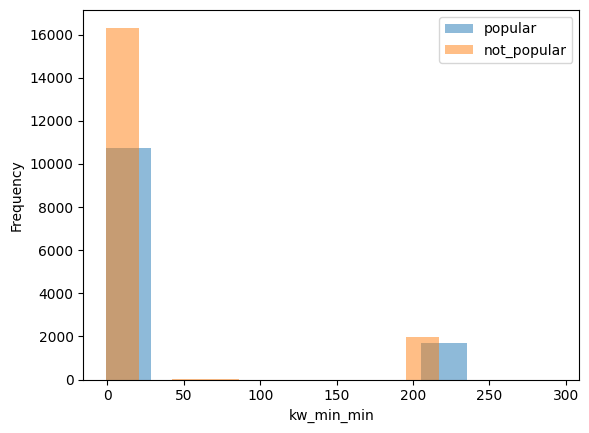

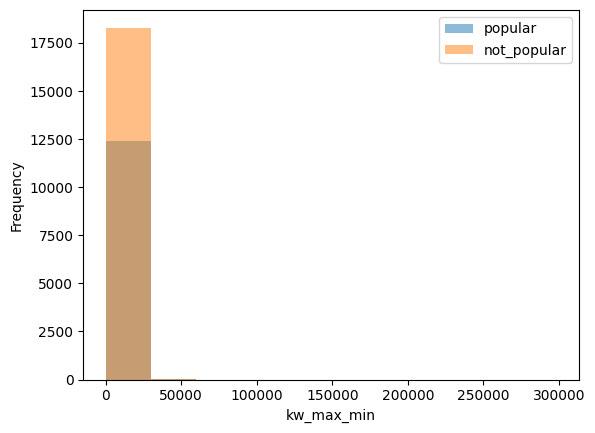

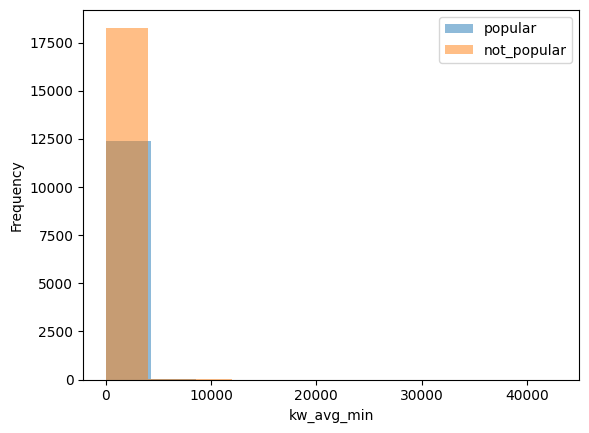

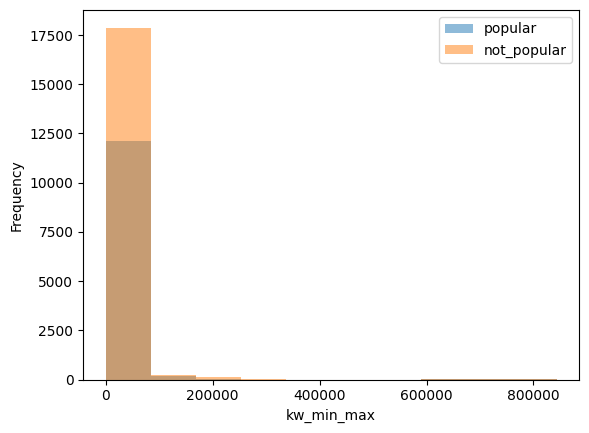

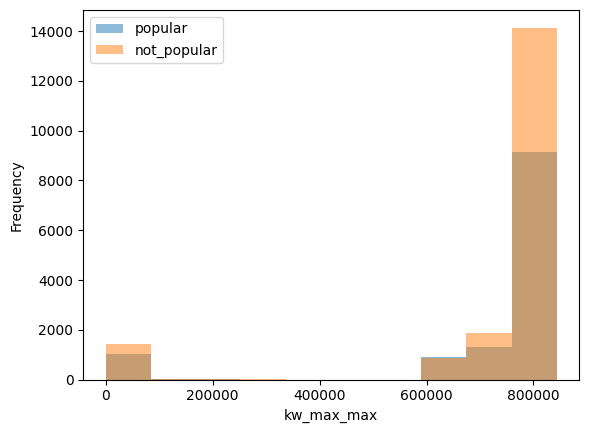

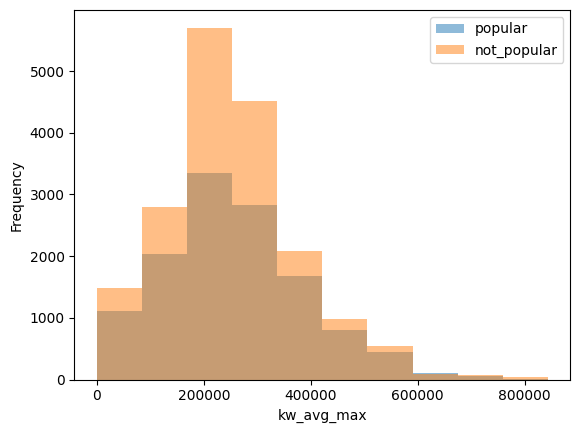

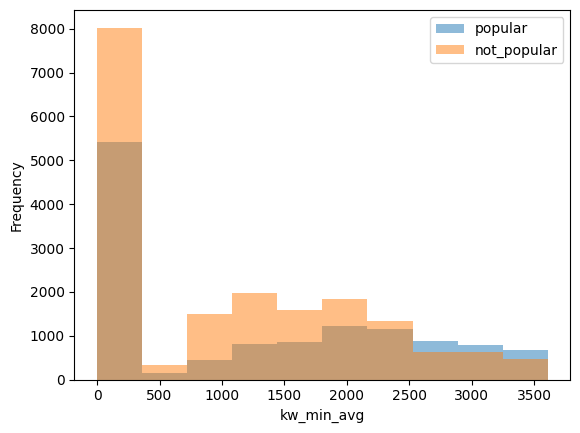

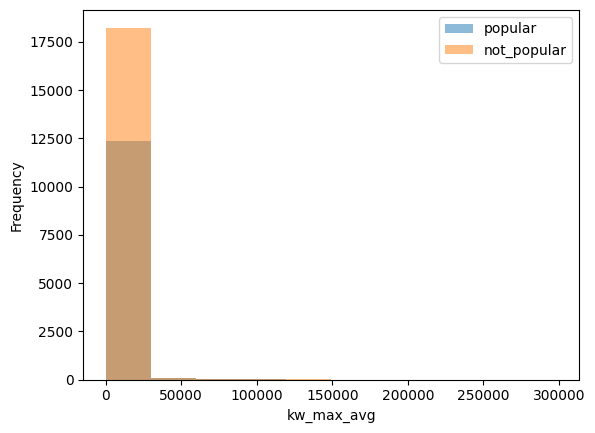

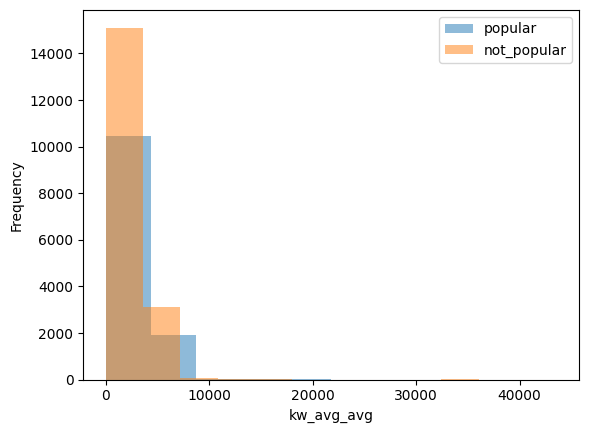

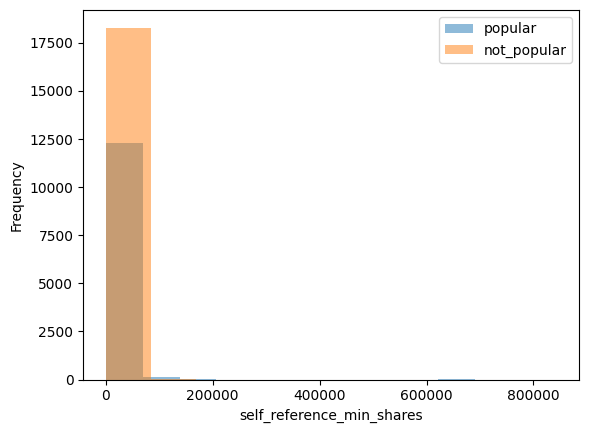

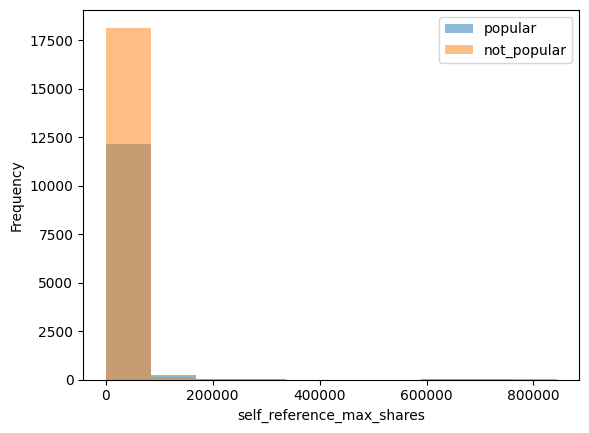

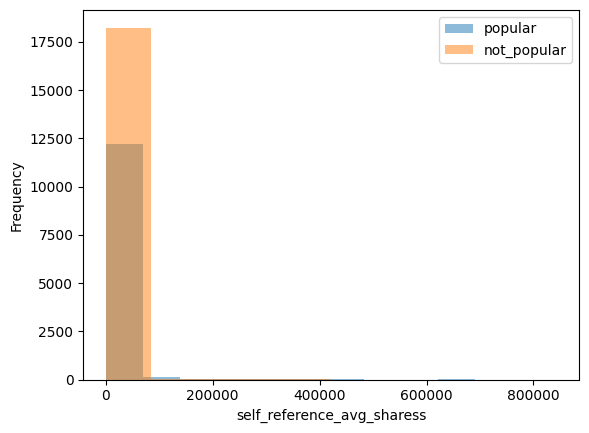

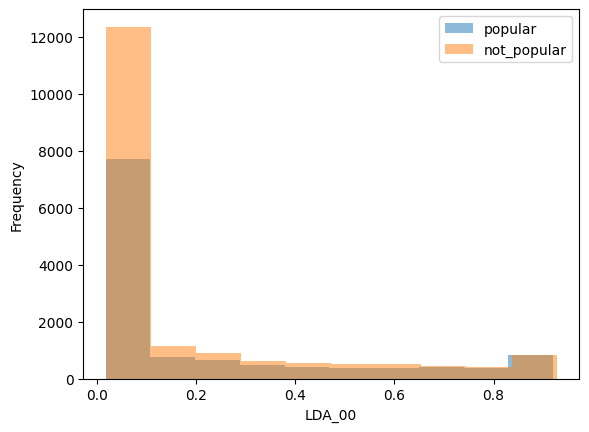

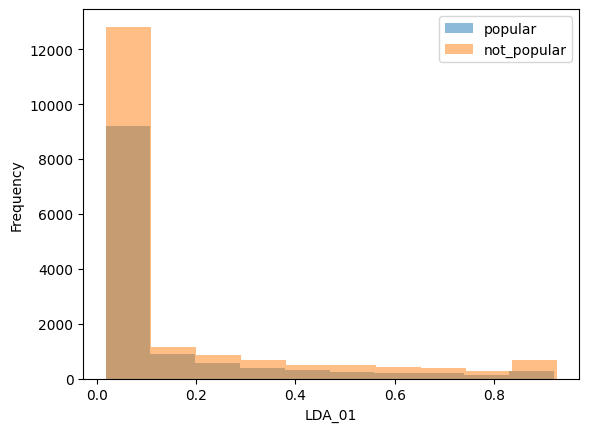

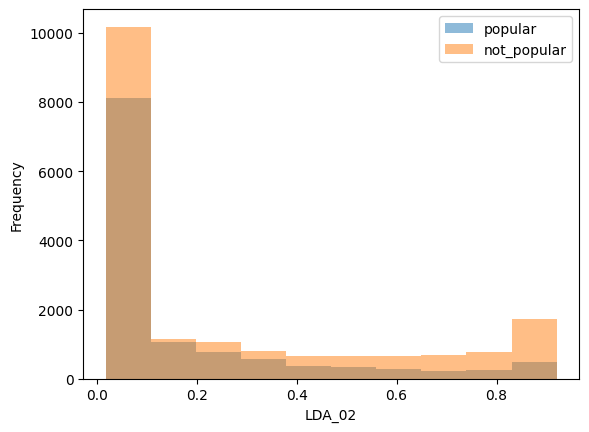

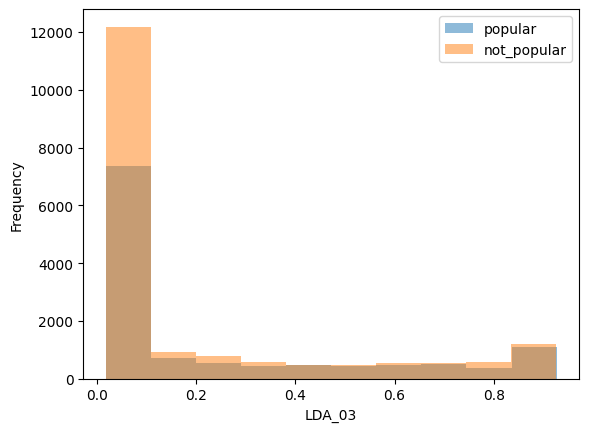

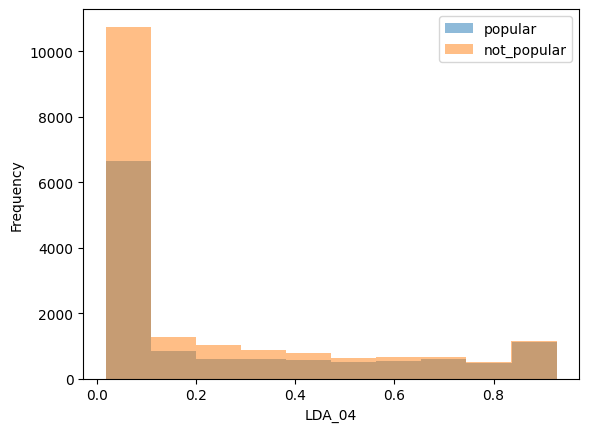

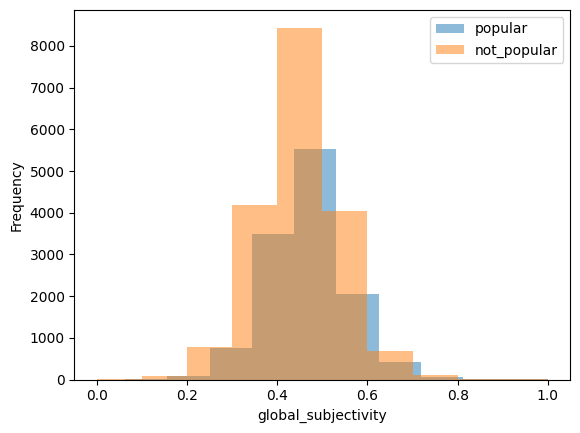

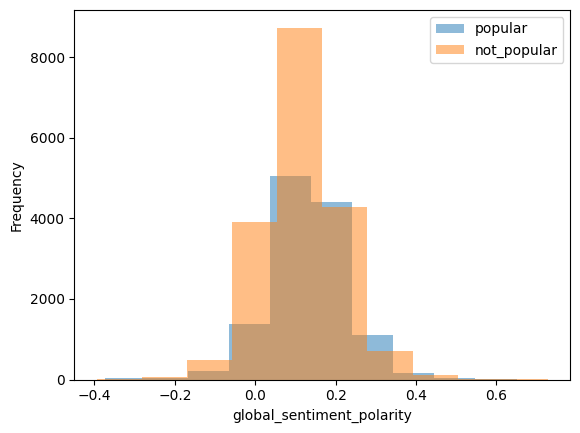

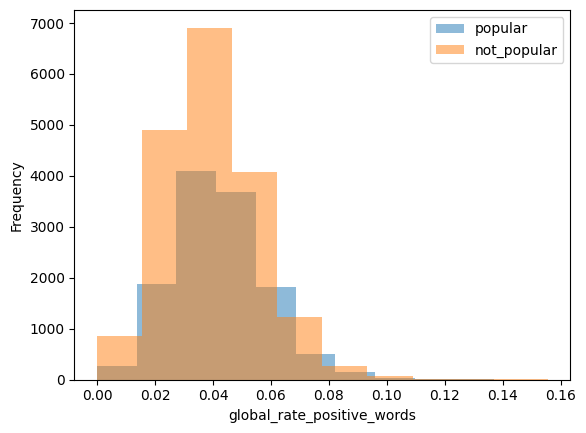

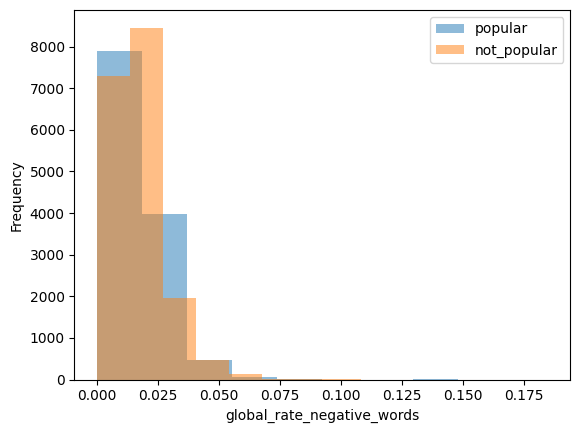

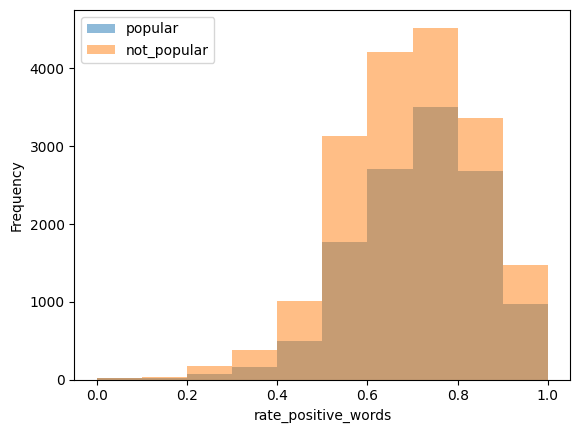

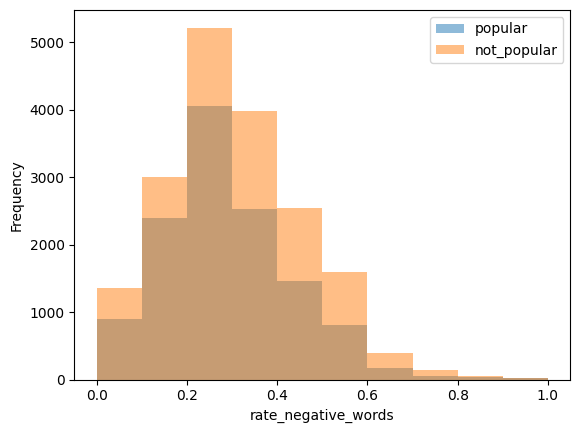

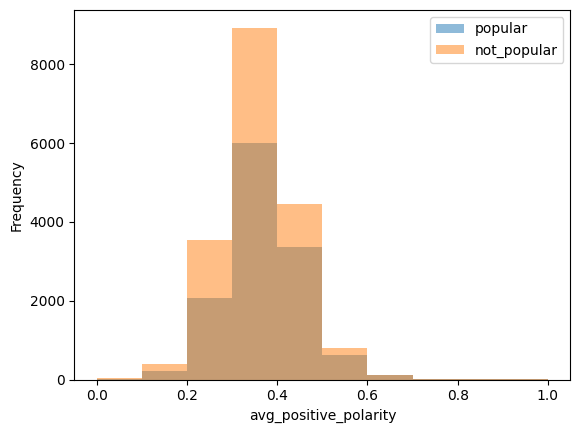

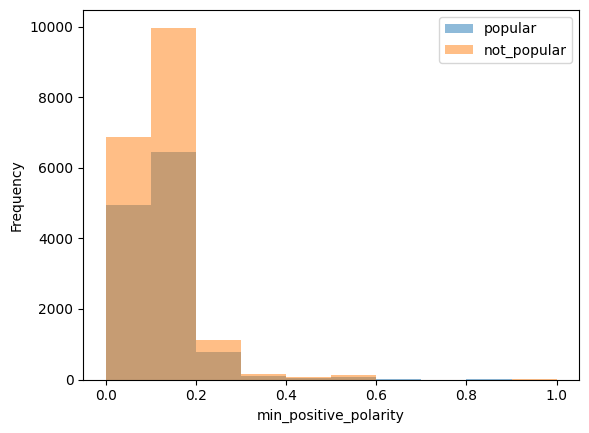

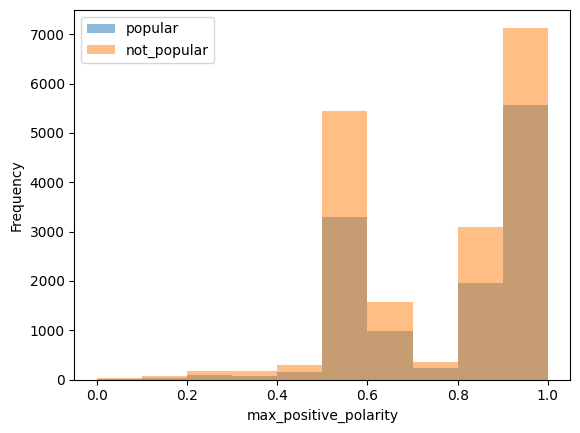

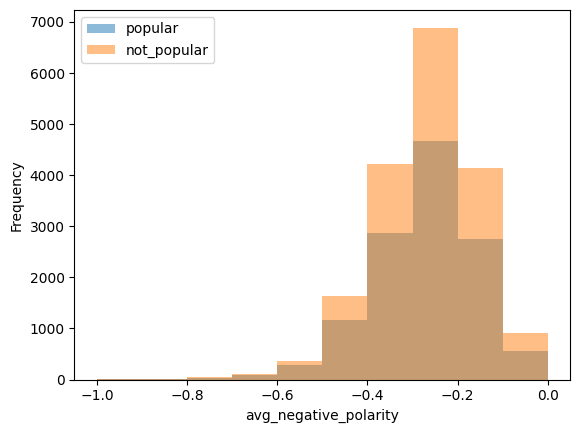

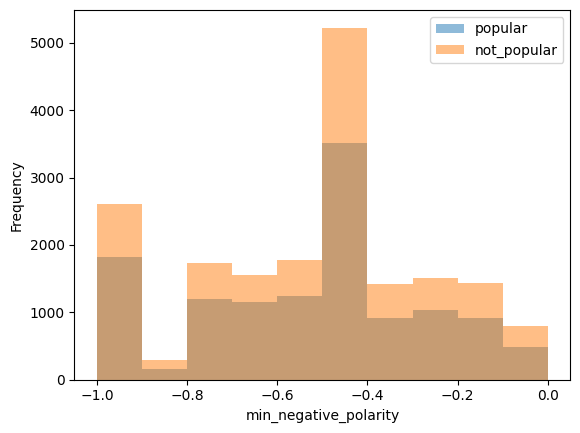

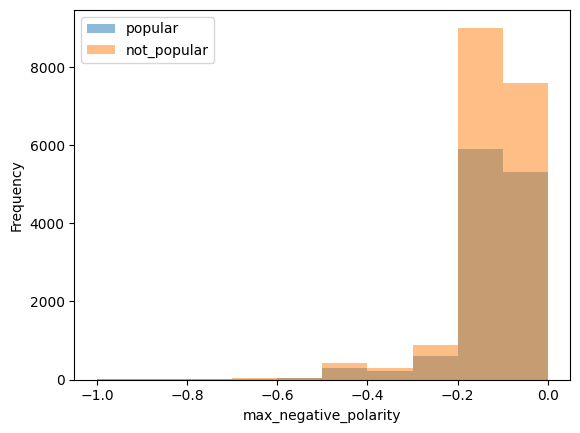

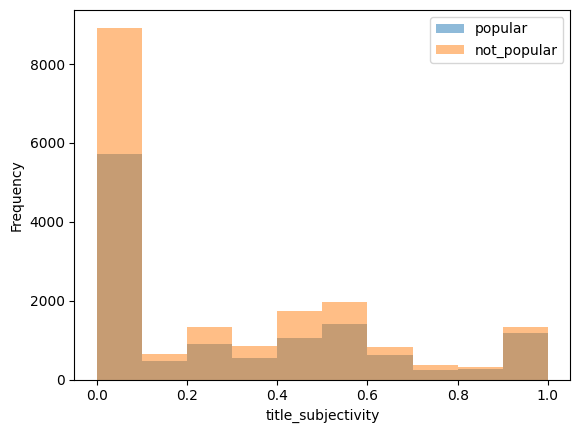

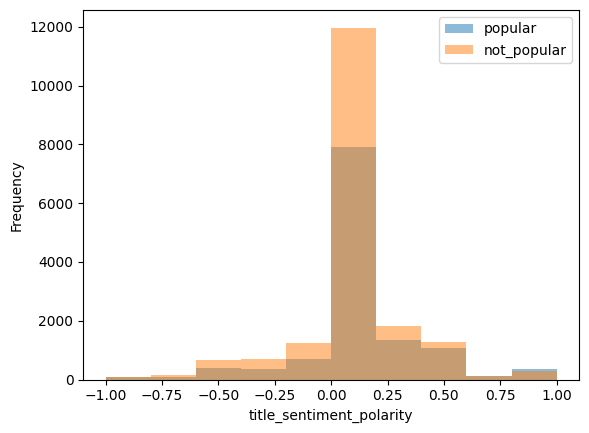

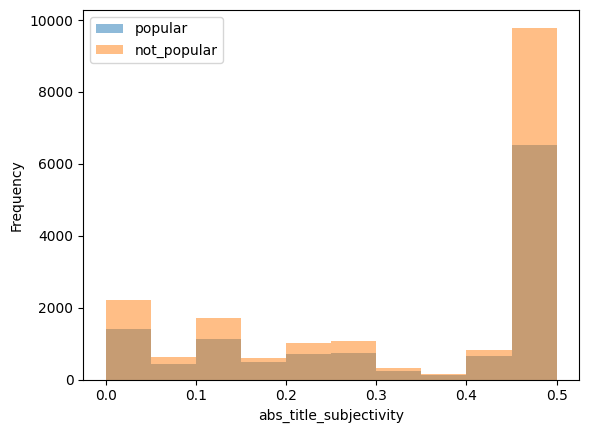

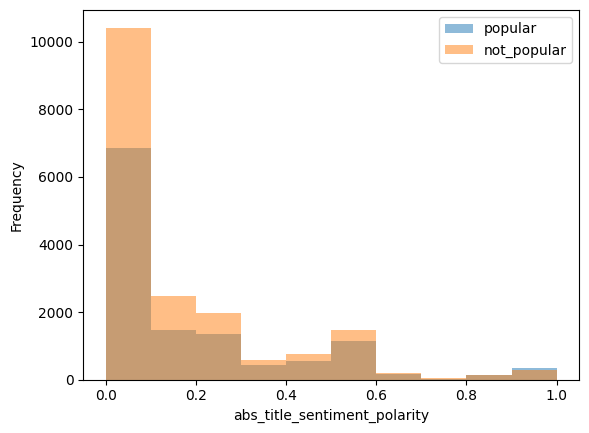

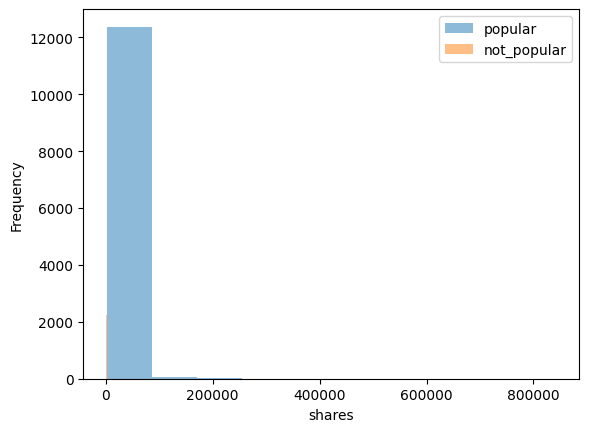

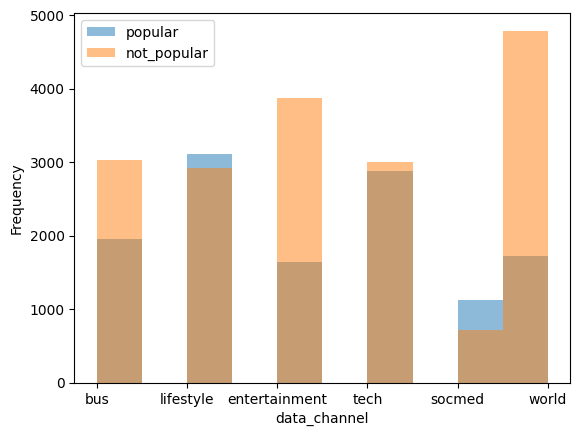

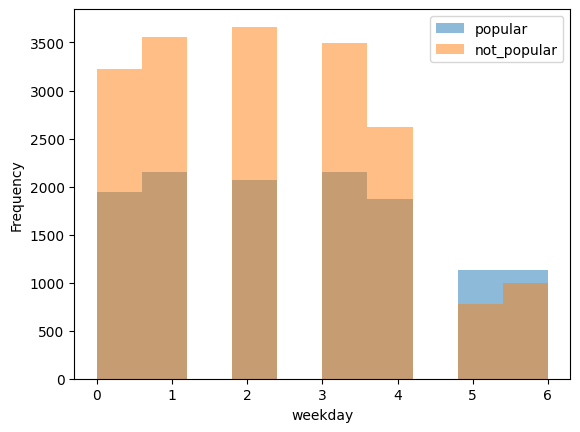

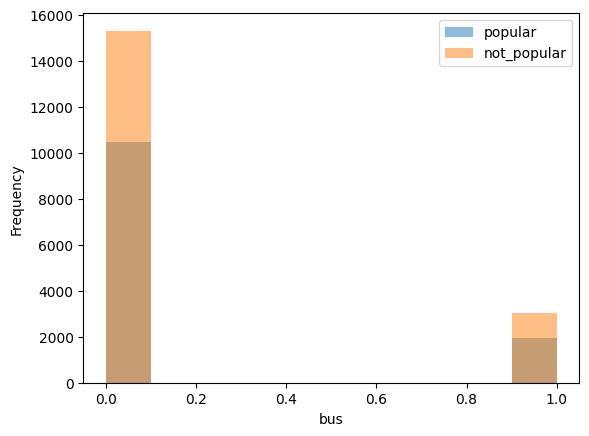

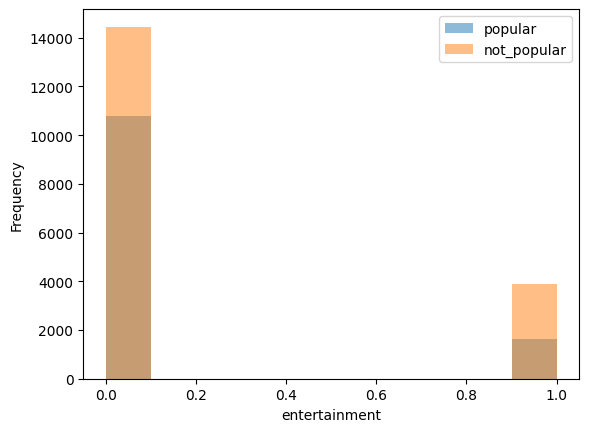

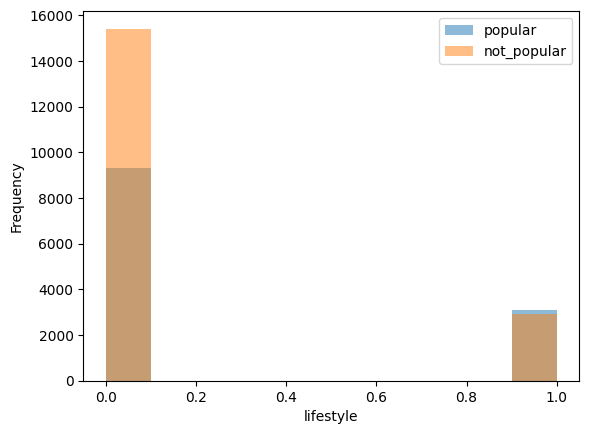

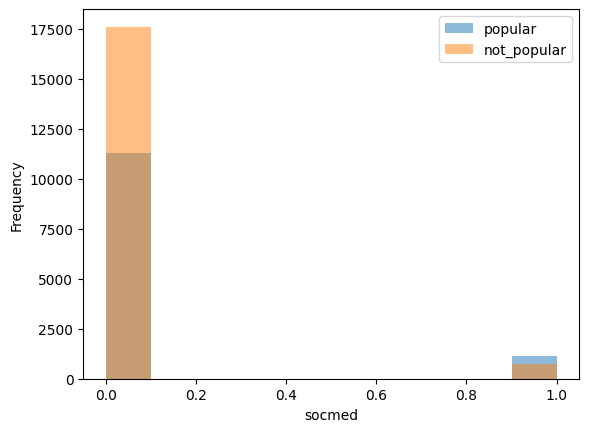

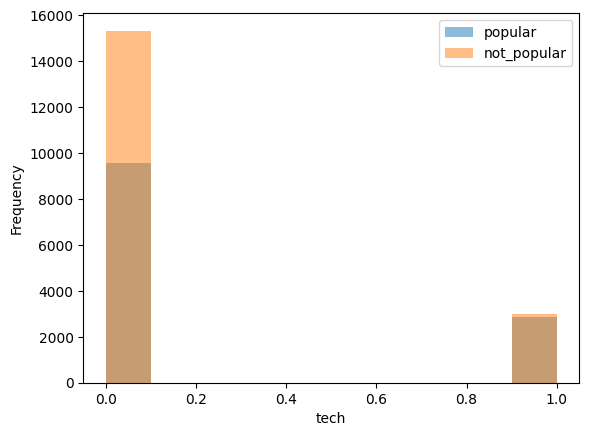

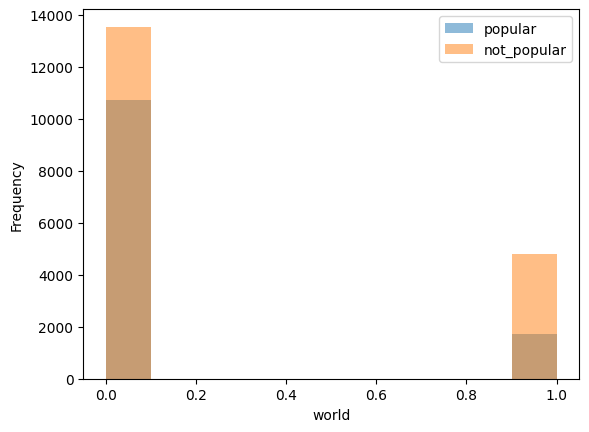

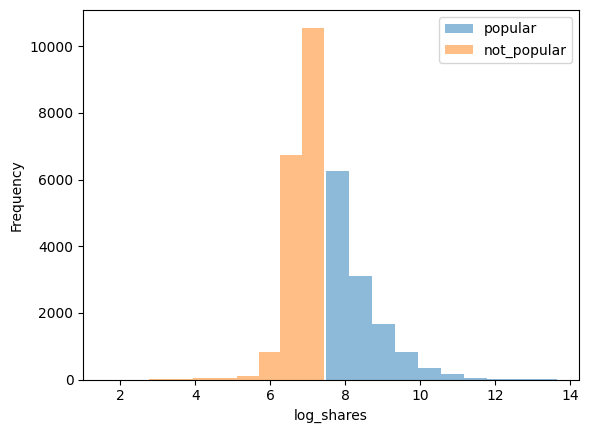

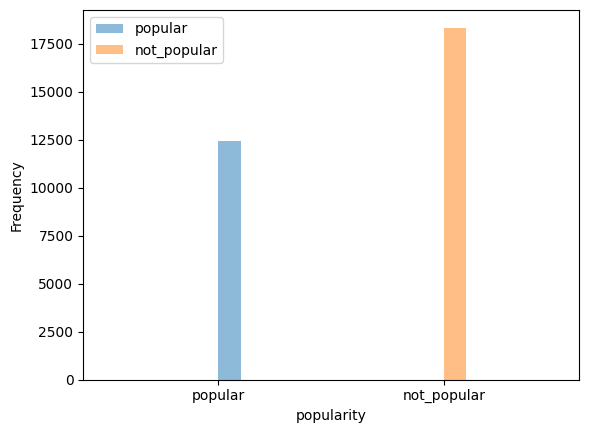

In [35]:
# Examining the Relationship between Features and Popularity

features = df_dev.columns
target = 'popularity'


popular = df_dev[df_dev[target] == 'popular']
not_popular = df_dev[df_dev[target] == 'not_popular']

for feature in features:
    plt.figure()
    plt.hist(popular[feature], bins=10, alpha=0.5, label='popular')
    plt.hist(not_popular[feature], bins=10, alpha=0.5, label='not_popular')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()


# --> each feature alone is not predictive 

In [63]:
del df_dev['data_channel']

/var/folders/m1/t6vbq_9s63g70tn3gd5vyczw0000gn/T/ipykernel_3976/561119656.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df_dev.corr()
/var/folders/m1/t6vbq_9s63g70tn3gd5vyczw0000gn/T/ipykernel_3976/561119656.py:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot: >

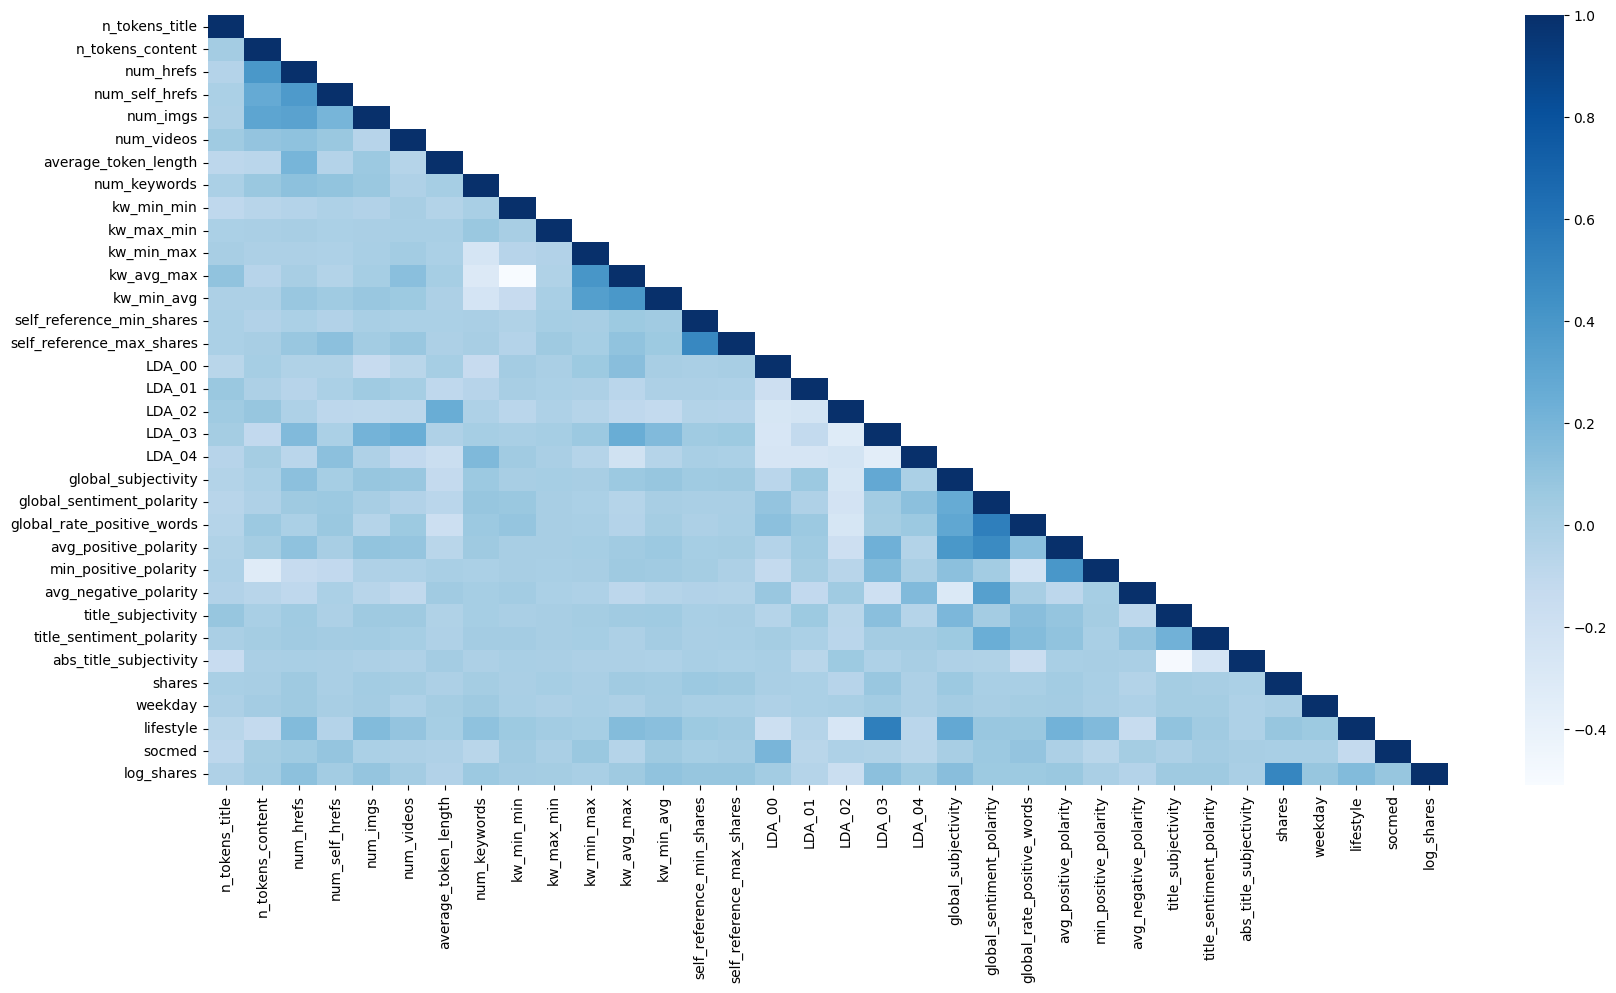

In [64]:
# let's see now the correlation between features

cor=df_dev.corr()
#ns.heatmap(cor)
plt.figure(figsize=(20,10))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

In [65]:
# build the correlation matrix and delete highly correlated features (a feature is highly correlated with an other if their abs(correlation)is > threshold )

corr_matrix = df_dev.corr()

corr_threshold = 0.58  # Define the correlation threshold (adjust as needed)
high_corr_features = set()  # Set to store the highly correlated features



# Iterate over the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            high_corr_features.add(colname)

/var/folders/m1/t6vbq_9s63g70tn3gd5vyczw0000gn/T/ipykernel_3976/811033246.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_dev.corr()


In [66]:
high_corr_features

set()

In [67]:
# remove highly correlated features from the dataset 

df_dev.drop(columns=high_corr_features, inplace=True)

In [68]:
df_dev.shape

(30768, 35)

/var/folders/m1/t6vbq_9s63g70tn3gd5vyczw0000gn/T/ipykernel_3976/3208946409.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df_dev.corr()
/var/folders/m1/t6vbq_9s63g70tn3gd5vyczw0000gn/T/ipykernel_3976/3208946409.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))


<AxesSubplot: >

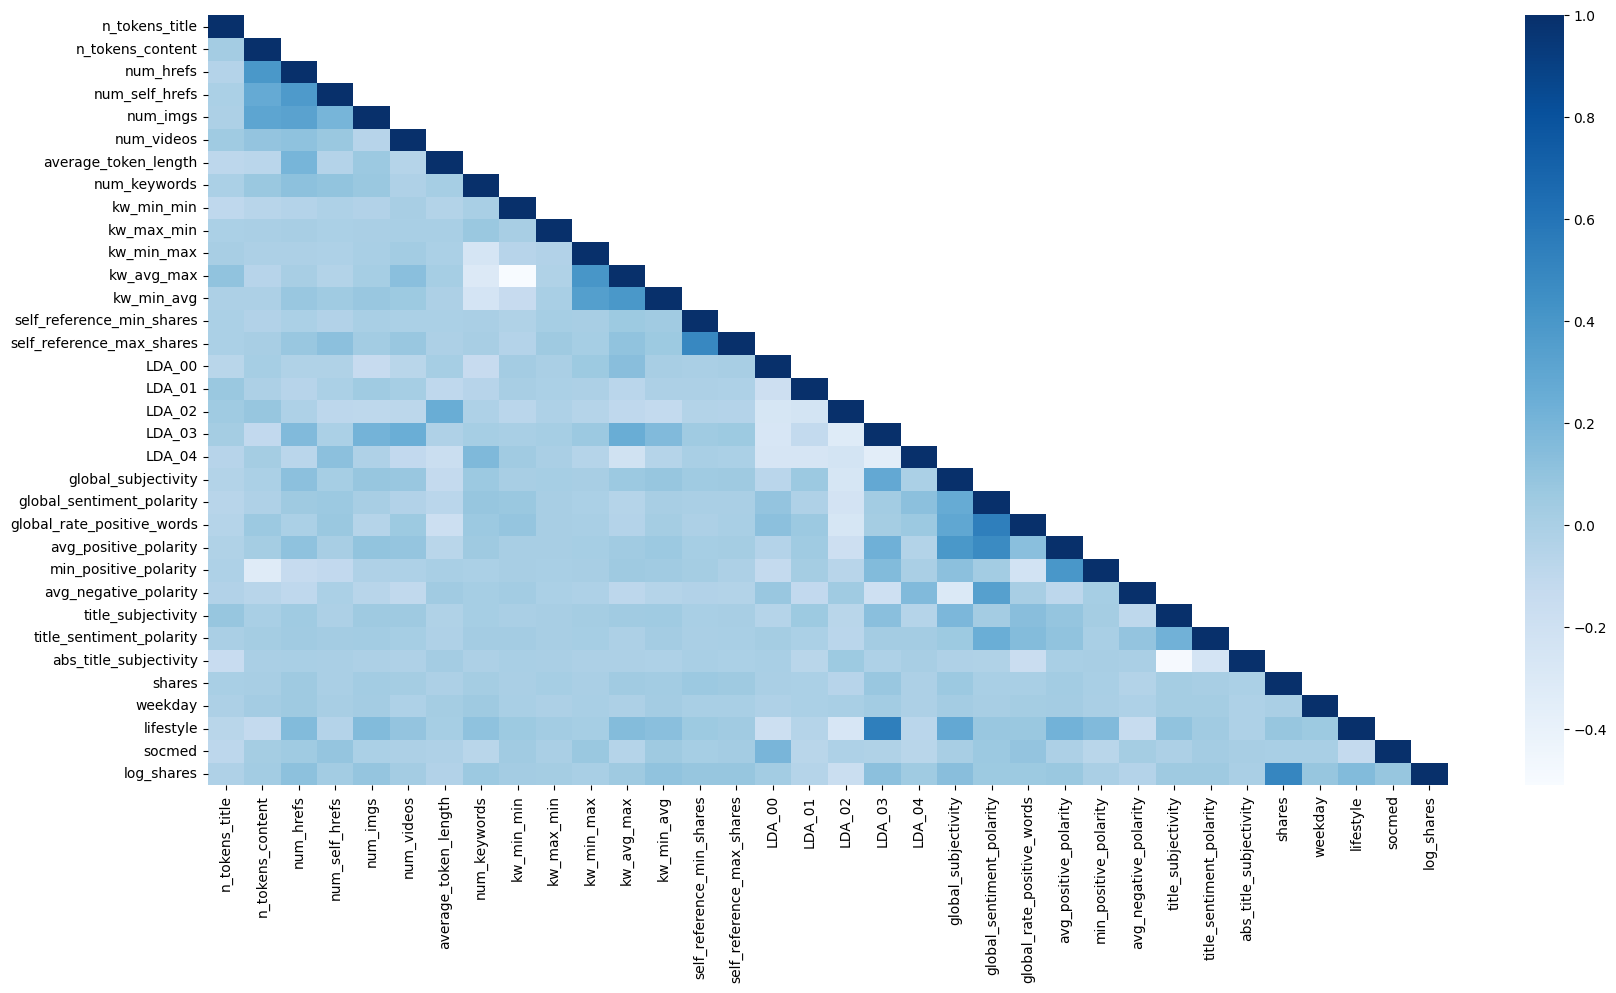

In [69]:
cor=df_dev.corr()
#ns.heatmap(cor)
plt.figure(figsize=(20,10))
df_lt = cor.where(np.tril(np.ones(cor.shape)).astype(np.bool))
sns.heatmap(df_lt,cmap='Blues')

# Model 1 --> train a regression model using all features

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Separate the features (X) and the target variable (y)
X = df_dev.drop(['popularity','shares','log_shares'], axis=1)  # Adjust 'target_variable' with your actual target column name
y = df_dev['shares']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size and random_state as needed

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


Root Mean Squared Error: 9420.885932313544


# Model 2 --> train a regression model using reduced  features with PCA

In [86]:
# first apply the standard scaling to features 
from sklearn.preprocessing import StandardScaler
# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [73]:
# apply PCA

from sklearn.decomposition import PCA
components = None #None -> means that the number of components returned will be the same as the number of original features in the dataset  
pca = PCA(n_components = components)
# perform PCA on the scaled data
pca.fit(X_scaled)

PCA()

In [74]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[9.25834243e+00 7.12961301e+00 6.25945457e+00 5.81496853e+00
 5.02130132e+00 4.54413113e+00 4.26929171e+00 4.15840514e+00
 3.97463577e+00 3.46099277e+00 3.39116869e+00 3.11771738e+00
 3.08066549e+00 3.00018221e+00 2.89260550e+00 2.83246253e+00
 2.61030005e+00 2.52724695e+00 2.39798285e+00 2.16836457e+00
 2.06683811e+00 1.95912257e+00 1.81335551e+00 1.65496933e+00
 1.52945758e+00 1.41530254e+00 1.34161420e+00 1.33279813e+00
 1.28551196e+00 1.17203742e+00 1.11932246e+00 7.82611773e-01
 6.17225839e-01 1.23973564e-24]



Text(0, 0.5, 'Explained variance (%)')

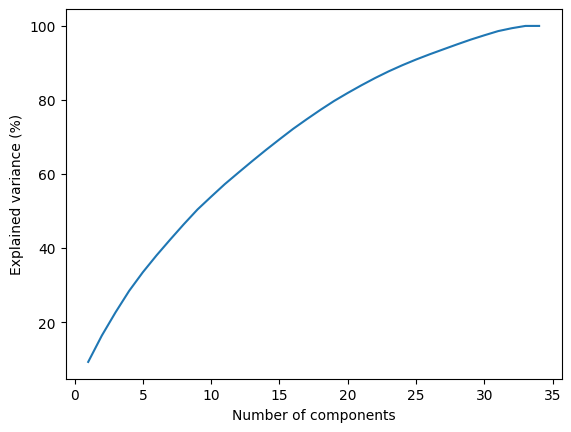

In [76]:
# plot a scree plot
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Cumulative Variances (Percentage):
[ 9.25834243 16.38795543 22.64741    28.46237853 33.48367985 38.02781098
 42.29710269 46.45550783 50.4301436  53.89113637 57.28230507 60.40002244
 63.48068793 66.48087014 69.37347564 72.20593817 74.81623822 77.34348517
 79.74146802 81.90983259 83.9766707  85.93579327]
Number of components: 22


Text(0, 0.5, 'Explained variance (%)')

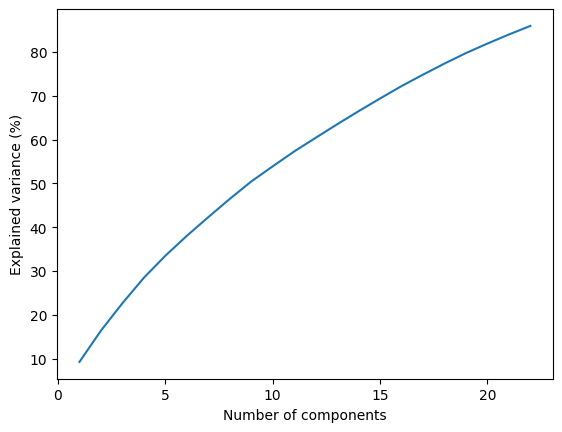

In [77]:
# apply PCA to find the desidered number of components that explain 85% of variance

from sklearn.decomposition import PCA
pca = PCA(n_components = 0.85)
pca.fit(X_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [80]:
pca_components = abs(pca.components_)


print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df_dev.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['LDA_03', 'global_subjectivity', 'lifestyle', 'avg_positive_polarity']
Component 1: ['kw_avg_max', 'global_sentiment_polarity', 'global_rate_positive_words', 'LDA_04']
Component 2: ['num_hrefs', 'n_tokens_content', 'num_self_hrefs', 'num_imgs']
Component 3: ['LDA_00', 'min_positive_polarity', 'global_rate_positive_words', 'kw_min_max']
Component 4: ['abs_title_subjectivity', 'title_subjectivity', 'n_tokens_title', 'LDA_01']
Component 5: ['self_reference_min_shares', 'self_reference_max_shares', 'shares', 'log_shares']
Component 6: ['avg_negative_polarity', 'LDA_01', 'title_sentiment_polarity', 'average_token_length']
Component 7: ['LDA_04', 'average_token_length', 'LDA_00', 'kw_min_min']
Component 8: ['self_reference_max_shares', 'self_reference_min_shares', 'shares', 'log_shares']
Component 9: ['LDA_01', 'avg_positive_polarity', 'lifestyle', 'shares']
Component 10: ['kw_min_min', 'num_imgs', 'num_keywords', 'n_tokens_title'

In [82]:
# Transforming all the 30 Columns to the 6 Principal Components

X_pca = pca.transform(X_scaled)
X_pca.shape


(30768, 22)

In [84]:
# creating a pipeline
from sklearn.pipeline import Pipeline

_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = LinearRegression()
regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [88]:
# perform a split
X = df_dev.drop(['popularity','shares','log_shares'], axis=1)  # Adjust 'target_variable' with your actual target column name
y = df_dev['shares']


X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=42)
# train the model using the PCA components
regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=22)),
                ('regressor', LinearRegression())])

In [90]:
# Make predictions on the test set
y_pred = regress_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 9210.815952994522
